In [6]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

#warnings removal
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

In [2]:
#data reading
customers = pd.read_csv('/Task 2 Prodigy internship/Mall_Customers.csv')
customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#customers = pd.get_dummies(customers, columns=['Gender'], drop_first=True)

In [7]:
#label encoding for 'Gender'
label_encoder = LabelEncoder()
customers['Gender'] = label_encoder.fit_transform(customers['Gender'])

In [8]:
customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [9]:
#selecting features
features = customers[['Annual Income (k$)', 'Spending Score (1-100)']]

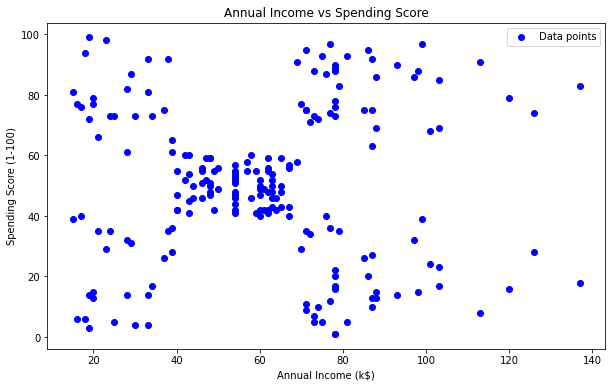

In [10]:
#plotting the features
plt.figure(figsize=(10, 6))
plt.scatter(features['Annual Income (k$)'], features['Spending Score (1-100)'], color='blue', label='Data points')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.legend()
plt.show()

In [11]:
#determining the optimal number of clusters using the elbow method and silhouette score, calculating davies bouldin score
inertia = []
sil_scores = []
davies_bouldin_scores = []
k_range = range(2, 11)

for n in k_range:
    kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(features)
    labels = kmeans.labels_
    
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(features, labels))
    davies_bouldin_scores.append(davies_bouldin_score(features, labels))
    
    print(f'k={n}, Inertia={kmeans.inertia_}, Silhouette Score={silhouette_score(features, labels):.3f}, Davies-Bouldin Index={davies_bouldin_score(features, labels):.3f}')

k=2, Inertia=181363.59595959596, Silhouette Score=0.297, Davies-Bouldin Index=1.257
k=3, Inertia=106348.37306211119, Silhouette Score=0.468, Davies-Bouldin Index=0.715
k=4, Inertia=73679.78903948834, Silhouette Score=0.493, Davies-Bouldin Index=0.710
k=5, Inertia=44448.45544793371, Silhouette Score=0.554, Davies-Bouldin Index=0.573
k=6, Inertia=37233.81451071001, Silhouette Score=0.540, Davies-Bouldin Index=0.652
k=7, Inertia=30241.343617936585, Silhouette Score=0.529, Davies-Bouldin Index=0.711
k=8, Inertia=25036.417604033984, Silhouette Score=0.455, Davies-Bouldin Index=0.759
k=9, Inertia=21916.794789843727, Silhouette Score=0.456, Davies-Bouldin Index=0.763
k=10, Inertia=20072.07093940401, Silhouette Score=0.441, Davies-Bouldin Index=0.761


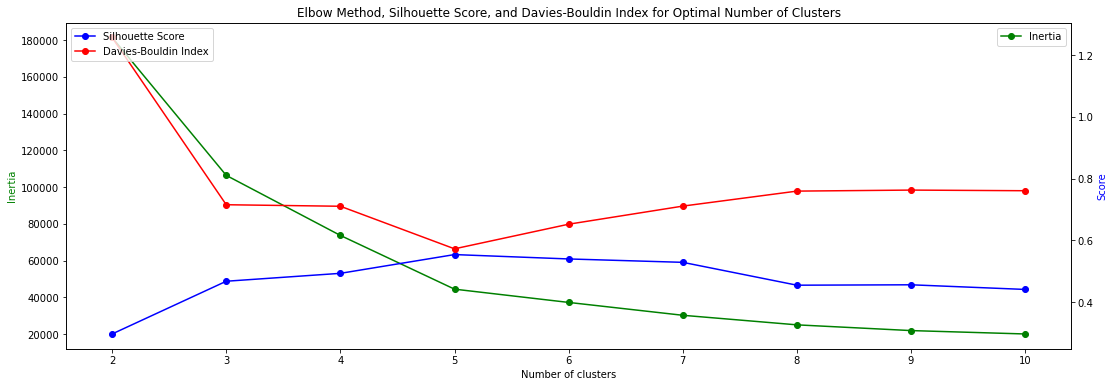

In [16]:
#plotting the elbow curve, silhouette scores, and Davies-Bouldin index
fig, ax1 = plt.subplots(figsize=(18, 6))

ax2 = ax1.twinx()
ax1.plot(k_range, inertia, 'g-', marker='o', label='Inertia')
ax2.plot(k_range, sil_scores, 'b-', marker='o', label='Silhouette Score')
ax2.plot(k_range, davies_bouldin_scores, 'r-', marker='o', label='Davies-Bouldin Index')

ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color='g')
ax2.set_ylabel('Score', color='b')
ax2.legend(loc='upper left')
ax1.legend(loc='upper right')

plt.title('Elbow Method, Silhouette Score, and Davies-Bouldin Index for Optimal Number of Clusters')
plt.show()

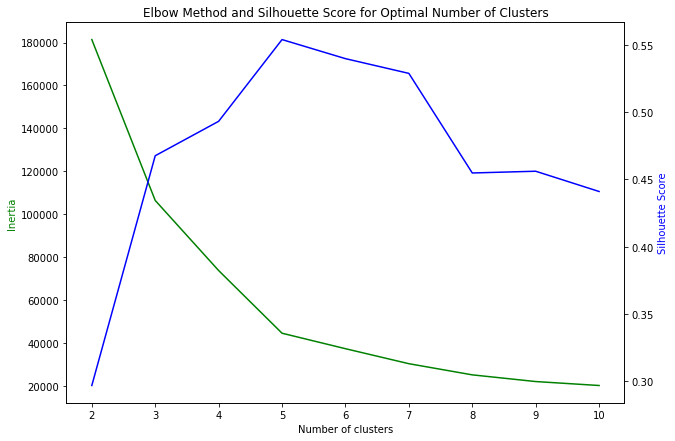

In [12]:
#plotting the elbow curve and silhouette scores
fig, ax1 = plt.subplots(figsize=(10, 7))

ax2 = ax1.twinx()
ax1.plot(k_range, inertia, 'g-')
ax2.plot(k_range, sil_scores, 'b-')

ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color='g')
ax2.set_ylabel('Silhouette Score', color='b')

plt.title('Elbow Method and Silhouette Score for Optimal Number of Clusters')
plt.show()

In [13]:
#based on the elbow curve and silhouette scores, the optimal number of clusters will be chosen
optimal_clusters = 5

In [14]:
#performing K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, random_state=42)

In [15]:
kmeans.fit(features)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [16]:
#assigning cluster labels to the dataset
customers['Cluster'] = kmeans.labels_

In [17]:
customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,3


In [18]:
#calculating Silhouette Score
silhouette_avg = silhouette_score(features, kmeans.labels_)
print(f'Silhouette Score for optimal clusters: {silhouette_avg}')

#calculating Davies-Bouldin Index
db_index = davies_bouldin_score(features, kmeans.labels_)
print(f'Davies-Bouldin Index for optimal clusters: {db_index}')

Silhouette Score for optimal clusters: 0.553931997444648
Davies-Bouldin Index for optimal clusters: 0.5725628995597082


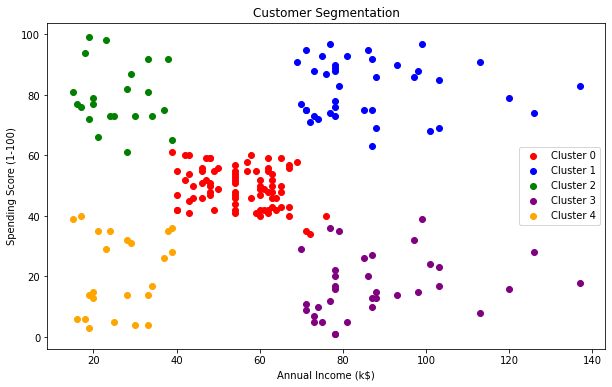

In [19]:
#scatter plot of the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange']

for cluster in range(optimal_clusters):
    clustered_data = customers[customers['Cluster'] == cluster]
    plt.scatter(clustered_data['Annual Income (k$)'], clustered_data['Spending Score (1-100)'], color=colors[cluster], label=f'Cluster {cluster}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.legend()
plt.show()

In [20]:
#cluster profiling
#descriptive statistics
cluster_profile = customers.groupby('Cluster').agg({
    'Age': ['mean', 'median', 'std'],
    'Annual Income (k$)': ['mean', 'median', 'std'],
    'Spending Score (1-100)': ['mean', 'median', 'std']
}).reset_index()

print(cluster_profile)

  Cluster        Age                   Annual Income (k$)                    \
                mean median        std               mean median        std   
0       0  42.716049   46.0  16.447822          55.296296   54.0   8.988109   
1       1  32.692308   32.0   3.728650          86.538462   79.0  16.312485   
2       2  25.272727   23.5   5.257030          25.727273   24.5   7.566731   
3       3  41.114286   42.0  11.341676          88.200000   85.0  16.399067   
4       4  45.217391   46.0  13.228607          26.304348   25.0   7.893811   

  Spending Score (1-100)                    
                    mean median        std  
0              49.518519   50.0   6.530909  
1              82.128205   83.0   9.364489  
2              79.363636   77.0  10.504174  
3              17.114286   16.0   9.952154  
4              20.913043   17.0  13.017167  


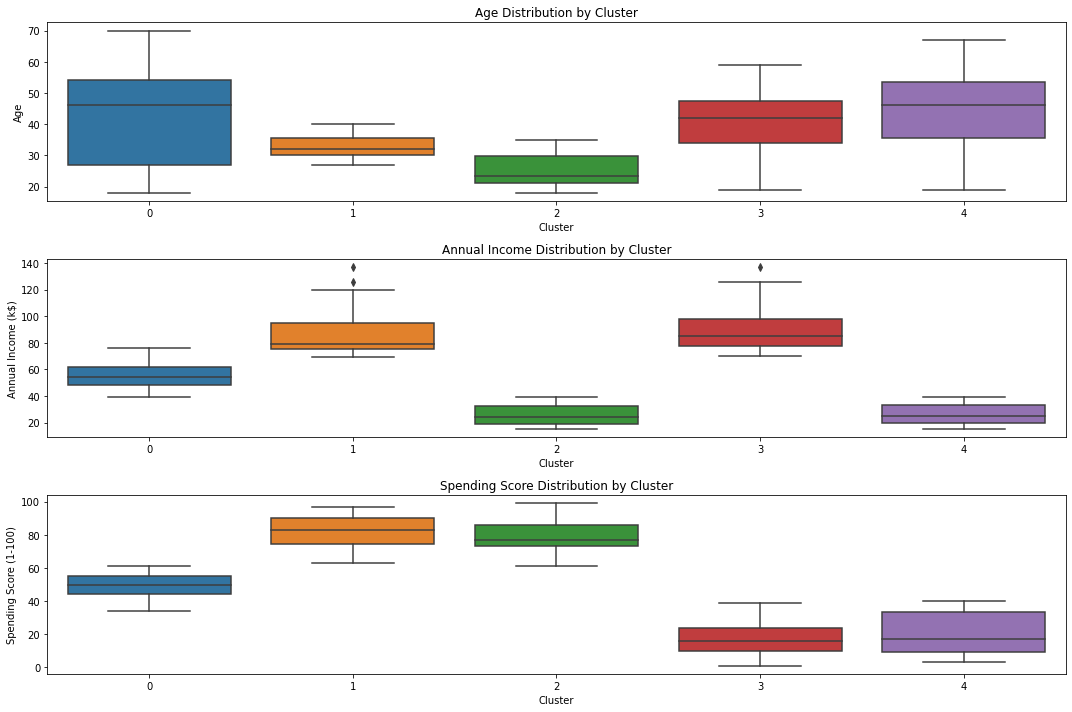

In [29]:
#box plots for profiling
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
sns.boxplot(x='Cluster', y='Age', data=customers)
plt.title('Age Distribution by Cluster')

plt.subplot(3, 1, 2)
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=customers)
plt.title('Annual Income Distribution by Cluster')

plt.subplot(3, 1, 3)
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=customers)
plt.title('Spending Score Distribution by Cluster')

plt.tight_layout()
plt.show()

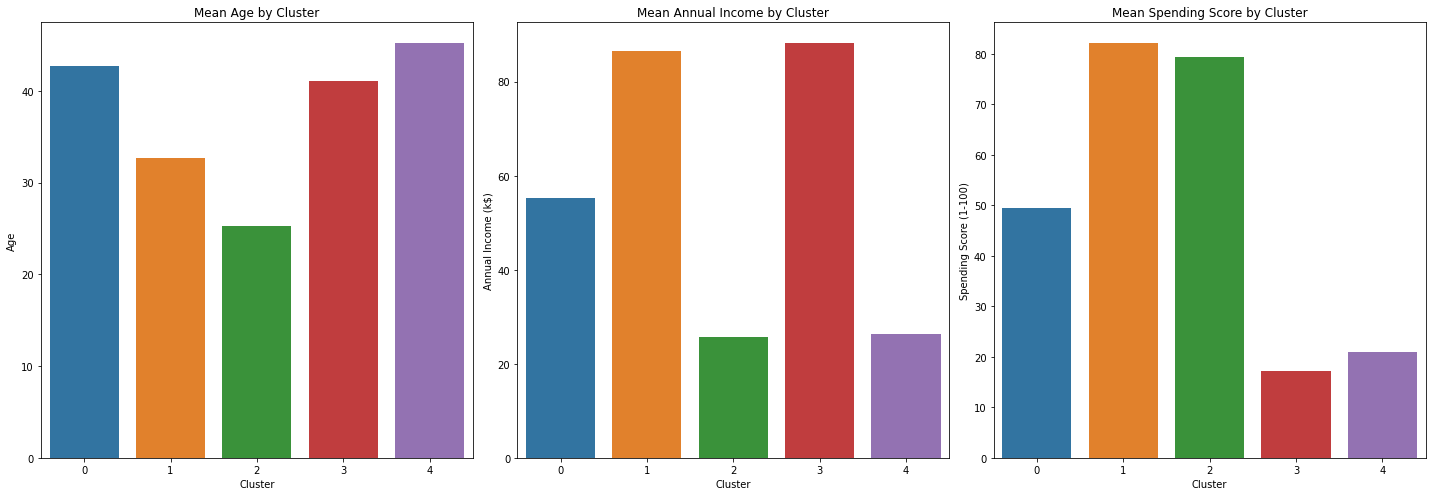

In [31]:
#bar charts for profiling
#mean values for each cluster
mean_values = customers.groupby('Cluster').mean().reset_index()

plt.figure(figsize=(20, 7))

plt.subplot(1, 3, 1)
sns.barplot(x='Cluster', y='Age', data=mean_values)
plt.title('Mean Age by Cluster')

plt.subplot(1, 3, 2)
sns.barplot(x='Cluster', y='Annual Income (k$)', data=mean_values)
plt.title('Mean Annual Income by Cluster')

plt.subplot(1, 3, 3)
sns.barplot(x='Cluster', y='Spending Score (1-100)', data=mean_values)
plt.title('Mean Spending Score by Cluster')

plt.subplots_adjust(wspace=0.4)  # Adjust the width space between the subplots
plt.tight_layout()
plt.show()